In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Import our input dataset
char_df = pd.read_csv('charity_data.csv')
char_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# What variable(s) are considered the target for your model?
    # IS_SUCCESSFUL - Y

# What variable(s) are considered to be the features for your model?
    # Status, Special_considiration, AFFILIATION, CLASSIFICATION, APPLICATION_TYPE, INCOME_AMT, ORGANIZATION, USE_CASE, ASK_AMT - X

# What variable(s) are neither and should be removed from the input data?
    # EIN, NAME

In [3]:
char_df1 = char_df.drop(["EIN", "NAME"],1)
char_df1.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Generate our categorical variable list
char_cat = char_df1.dtypes[char_df1.dtypes == "object"].index.tolist()
char_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [5]:
# Check the number of unique values in each column
char_df1[char_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [6]:
# Check the unique value counts to see if binning is required - CLASSIFICATION
class_counts = char_df1.CLASSIFICATION.value_counts()
print(class_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1370        1
C2380        1
C2561        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


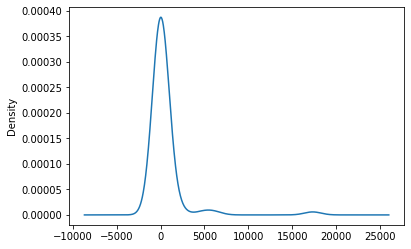

In [7]:
# Visualize the value counts - CLASSIFICATION 
class_counts.plot.density()

In [8]:
# Determine which values to replace - CLASSIFICATION
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in DataFrame
for classification in replace_class:
    char_df1.CLASSIFICATION = char_df1.CLASSIFICATION.replace(classification,"Other")
# Check to make sure binning was successful
char_df1.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Check the unique value counts to see if binning is required - APPLICATION_TYPE
apptype_counts = char_df1.APPLICATION_TYPE.value_counts()
print(apptype_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [10]:
# Determine which values to replace - APPLICATION_TYPE
replace_apptype = list(apptype_counts[apptype_counts < 500].index)

# Replace in DataFrame
for apptype in replace_apptype:
    char_df1.APPLICATION_TYPE = char_df1.APPLICATION_TYPE.replace(apptype,"Other")


# Check to make sure binning was successful
char_df1.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Check the number of unique values in each column
char_df1[char_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(char_df1[char_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(char_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
char_df1 = char_df1.merge(encode_df,left_index=True, right_index=True)
char_df1 = char_df1.drop(char_cat,1)
char_df1

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = char_df1["IS_SUCCESSFUL"].values
X = char_df1.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# DEEP LEARNING MODEL

In [17]:
len(X_train[0])

43

In [35]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3520      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 67us/sample - loss: 0.6934 - accuracy: 0.5280
Epoch 2/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.6914 - accuracy: 0.5308
Epoch 3/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.6916 - accuracy: 0.5318
Epoch 4/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.6916 - accuracy: 0.5308
Epoch 5/100
25724/25724 [==============================] - 1s 50us/sample - loss: 0.6917 - accuracy: 0.5300
Epoch 6/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.6916 - accuracy: 0.5306
Epoch 7/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.6916 - accuracy: 0.5312
Epoch 8/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.6915 - accuracy: 0.5300
Epoch 9/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6915 - accuracy: 0.5318
Epoch

25724/25724 [==============================] - 1s 48us/sample - loss: 0.6915 - accuracy: 0.5297
Epoch 77/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.6917 - accuracy: 0.5308
Epoch 78/100
25724/25724 [==============================] - 1s 53us/sample - loss: 0.6915 - accuracy: 0.5318
Epoch 79/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.6916 - accuracy: 0.5307
Epoch 80/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.6915 - accuracy: 0.5305
Epoch 81/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.6917 - accuracy: 0.5308
Epoch 82/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.6916 - accuracy: 0.5318
Epoch 83/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.6916 - accuracy: 0.5318
Epoch 84/100
25724/25724 [==============================] - 1s 47us/sample - loss: 0.6917 - accuracy: 0.5318
Epoch 85/100
25724/25724 [======

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6908 - accuracy: 0.5343
Loss: 0.6908037108513079, Accuracy: 0.5343440175056458


In [22]:
# NEURAL NETWORK MODEL

In [23]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=43))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 44        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.6687 - accuracy: 0.6400
Epoch 2/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.6054 - accuracy: 0.7107
Epoch 3/100
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5890 - accuracy: 0.7149
Epoch 4/100
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5857 - accuracy: 0.7162
Epoch 5/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5844 - accuracy: 0.7165
Epoch 6/100
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5837 - accuracy: 0.7166
Epoch 7/100
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5827 - accuracy: 0.7165
Epoch 8/100
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5814 - accuracy: 0.7160
Epoch 9/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5807 - accuracy: 0.7161
Epoch

Epoch 76/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5795 - accuracy: 0.7161
Epoch 77/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5795 - accuracy: 0.7161
Epoch 78/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5795 - accuracy: 0.7159
Epoch 79/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5796 - accuracy: 0.7156
Epoch 80/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5795 - accuracy: 0.7159
Epoch 81/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5795 - accuracy: 0.7160
Epoch 82/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.5796 - accuracy: 0.7159
Epoch 83/100
25724/25724 [==============================] - 1s 46us/sample - loss: 0.5795 - accuracy: 0.7159
Epoch 84/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5795 - accuracy: 0.7158
Epoch 85/100
25724/

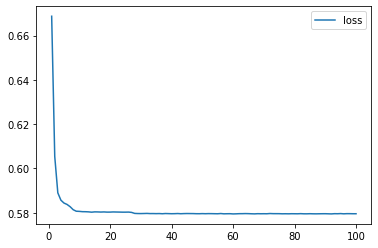

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

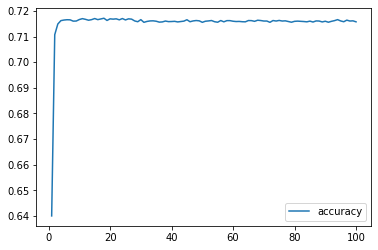

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5833 - accuracy: 0.7130
Loss: 0.5832519899582377, Accuracy: 0.7130029201507568


In [29]:
# BASIC NEURAL NETWORK MODEL

In [30]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=43))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.6039 - accuracy: 0.7043
Epoch 2/100
25724/25724 [==============================] - 1s 39us/sample - loss: 0.5645 - accuracy: 0.7247
Epoch 3/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5587 - accuracy: 0.7278
Epoch 4/100
25724/25724 [==============================] - 1s 49us/sample - loss: 0.5559 - accuracy: 0.7284
Epoch 5/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5542 - accuracy: 0.7293
Epoch 6/100
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5533 - accuracy: 0.7294
Epoch 7/100
25724/25724 [==============================] - 1s 40us/sample - loss: 0.5523 - accuracy: 0.7308
Epoch 8/100
25724/25724 [==============================] - 1s 42us/sample - loss: 0.5514 - accuracy: 0.7318
Epoch 9/100
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5506 - accuracy: 0.7312
Epoch

25724/25724 [==============================] - 2s 65us/sample - loss: 0.5430 - accuracy: 0.7347
Epoch 77/100
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5426 - accuracy: 0.7343
Epoch 78/100
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5429 - accuracy: 0.7339
Epoch 79/100
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5427 - accuracy: 0.7343
Epoch 80/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5426 - accuracy: 0.7342
Epoch 81/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5428 - accuracy: 0.7339
Epoch 82/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5424 - accuracy: 0.7350
Epoch 83/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5425 - accuracy: 0.7337
Epoch 84/100
25724/25724 [==============================] - 2s 84us/sample - loss: 0.5425 - accuracy: 0.7352
Epoch 85/100
25724/25724 [======

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5549 - accuracy: 0.7321
Loss: 0.5549086048721225, Accuracy: 0.7321282625198364


In [32]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.714


In [33]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.466
